In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split


## Financial Risk for Loan Approval

In [2]:
raw_data = pd.read_csv('loan_data_V1.csv')
raw_data

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


In [3]:
raw_data['LoanApproved'].value_counts()

LoanApproved
0    15220
1     4780
Name: count, dtype: int64

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

## Split into Numeric and Categorical Datasets

In [5]:
baseline_df_numeric = raw_data.select_dtypes(include=[np.number])
baseline_df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   Experience                  20000 non-null  int64  
 4   LoanAmount                  20000 non-null  int64  
 5   LoanDuration                20000 non-null  int64  
 6   NumberOfDependents          20000 non-null  int64  
 7   MonthlyDebtPayments         20000 non-null  int64  
 8   CreditCardUtilizationRate   20000 non-null  float64
 9   NumberOfOpenCreditLines     20000 non-null  int64  
 10  NumberOfCreditInquiries     20000 non-null  int64  
 11  DebtToIncomeRatio           20000 non-null  float64
 12  BankruptcyHistory           20000 non-null  int64  
 13  PreviousLoanDefaults        200

In [6]:
baseline_df_categorical = raw_data.select_dtypes(include=[object])
baseline_df_categorical

,ApplicationDate,EmploymentStatus,EducationLevel,MaritalStatus,HomeOwnershipStatus,LoanPurpose
0,2018-01-01,Employed,Master,Married,Own,Home
1,2018-01-02,Employed,Associate,Single,Mortgage,Debt Consolidation
2,2018-01-03,Employed,Bachelor,Married,Rent,Education
3,2018-01-04,Employed,High School,Single,Mortgage,Home
4,2018-01-05,Employed,Associate,Married,Mortgage,Debt Consolidation
...,...,...,...,...,...,...
19995,2072-09-29,Employed,High School,Married,Rent,Auto
19996,2072-09-30,Employed,Associate,Married,Rent,Debt Consolidation
19997,2072-10-01,Employed,Bachelor,Married,Mortgage,Home
19998,2072-10-02,Employed,High School,Married,Own,Debt Consolidation


## One Hot Encoding for Categorical Data

In [7]:
one_hot_cols = ['EmploymentStatus','EducationLevel','MaritalStatus','HomeOwnershipStatus','LoanPurpose']
one_hot_cols

['EmploymentStatus',
 'EducationLevel',
 'MaritalStatus',
 'HomeOwnershipStatus',
 'LoanPurpose']

In [8]:
baseline_df_categorical_encoded = pd.get_dummies(baseline_df_categorical, columns=one_hot_cols, drop_first=True)
baseline_df_categorical_encoded

,ApplicationDate,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,2018-01-01,False,False,False,False,False,True,True,False,False,False,True,False,False,False,True,False
1,2018-01-02,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
2,2018-01-03,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False
3,2018-01-04,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False
4,2018-01-05,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
19996,2072-09-30,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False
19997,2072-10-01,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False
19998,2072-10-02,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False,False


In [9]:
baseline_df_categorical_encoded = baseline_df_categorical_encoded.drop(columns='ApplicationDate')
baseline_df_categorical_encoded

,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,False,False,False,False,False,True,True,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
2,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False
3,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
19996,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False
19997,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False
19998,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False,False


## Join Dataset Before Train Test Split and Sampling

In [10]:
model_df_baseline = baseline_df_categorical_encoded
baseline_df_numeric_columns = baseline_df_numeric.columns
model_df_baseline[baseline_df_numeric_columns] = baseline_df_numeric
model_df_baseline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   EmploymentStatus_Self-Employed  20000 non-null  bool   
 1   EmploymentStatus_Unemployed     20000 non-null  bool   
 2   EducationLevel_Bachelor         20000 non-null  bool   
 3   EducationLevel_Doctorate        20000 non-null  bool   
 4   EducationLevel_High School      20000 non-null  bool   
 5   EducationLevel_Master           20000 non-null  bool   
 6   MaritalStatus_Married           20000 non-null  bool   
 7   MaritalStatus_Single            20000 non-null  bool   
 8   MaritalStatus_Widowed           20000 non-null  bool   
 9   HomeOwnershipStatus_Other       20000 non-null  bool   
 10  HomeOwnershipStatus_Own         20000 non-null  bool   
 11  HomeOwnershipStatus_Rent        20000 non-null  bool   
 12  LoanPurpose_Debt Consolidation  

## Split into Training Features and Target Labels

In [11]:
X = model_df_baseline.drop(columns=['LoanApproved'])
X

,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Other,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,False,False,False,False,False,True,True,False,False,False,...,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,49.0
1,False,False,False,False,False,False,False,True,False,False,...,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,52.0
2,False,False,True,False,False,False,True,False,False,False,...,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,52.0
3,False,False,False,False,True,False,False,True,False,False,...,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,54.0
4,False,False,False,False,False,False,True,False,False,False,...,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,True,False,True,False,False,False,...,25642,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,55.0
19996,False,False,False,False,False,False,True,False,False,False,...,5569,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,54.0
19997,False,False,True,False,False,False,True,False,False,False,...,4653,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,45.0
19998,False,False,False,False,True,False,True,False,False,False,...,11485,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,59.0


In [12]:
y = pd.DataFrame(model_df_baseline['LoanApproved'])
y

,LoanApproved
0,0
1,0
2,0
3,0
4,1
...,...
19995,0
19996,0
19997,0
19998,0


## Oversampling Minority Class with SMOTE, Random Undersampling for Majority Class

In [13]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [14]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [15]:
def apply_smote(X, y, random_state=42):
    smote = SMOTE(random_state=random_state)
    X_res, y_res = smote.fit_resample(X, y)
    return X_res, y_res

In [16]:
def apply_random_undersampling(X, y, random_state=42):
    rus = RandomUnderSampler(random_state=random_state)
    X_res, y_res = rus.fit_resample(X, y)
    return X_res, y_res

In [17]:
def show_class_distribution(y, title="Class distribution"):
    counter = Counter(y)
    print(f"\n{title}:")
    for label, count in counter.items():
        print(f"  Class {label}: {count}")

In [18]:
# Show original distribution
show_class_distribution(y, "Original class distribution")

# Step 1: Apply SMOTE
X_smote, y_smote = apply_smote(X, y)
show_class_distribution(y_smote, "After SMOTE")

# Step 2: Apply Random Undersampling
X_undersampled, y_undersampled = apply_random_undersampling(X, y)
show_class_distribution(y_undersampled, "After SMOTE + Random Undersampling")


Original class distribution:
  Class LoanApproved: 1

After SMOTE:
  Class LoanApproved: 1

After SMOTE + Random Undersampling:
  Class LoanApproved: 1


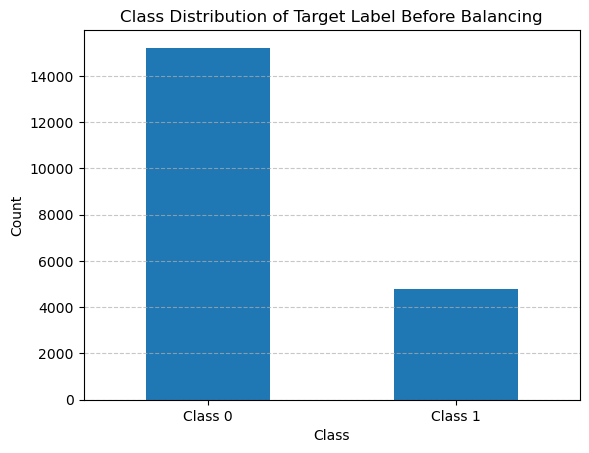

In [19]:
y['LoanApproved'].value_counts().sort_index().plot(kind='bar')
plt.xticks([0, 1], ['Class 0', 'Class 1'], rotation=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution of Target Label Before Balancing')
plt.grid(axis='y', linestyle='--', alpha=0.7)

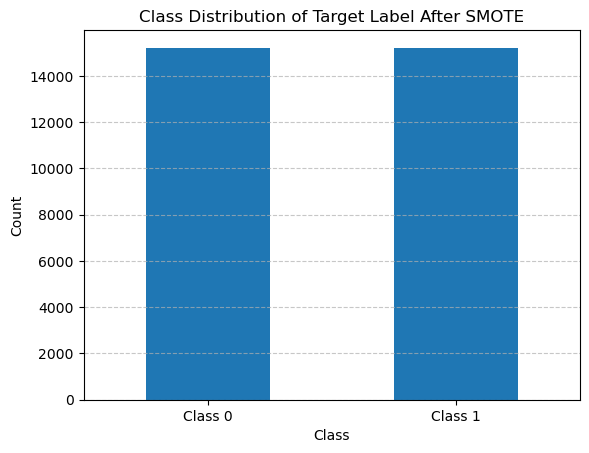

In [20]:
y_smote['LoanApproved'].value_counts().sort_index().plot(kind='bar')
plt.xticks([0, 1], ['Class 0', 'Class 1'], rotation=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution of Target Label After SMOTE')
plt.grid(axis='y', linestyle='--', alpha=0.7)

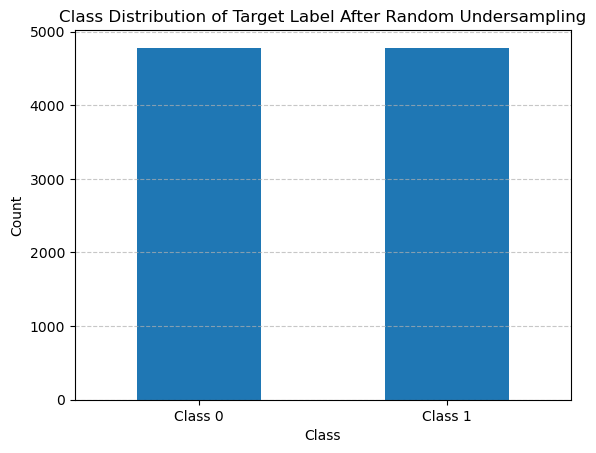

In [21]:
y_undersampled['LoanApproved'].value_counts().sort_index().plot(kind='bar')
plt.xticks([0, 1], ['Class 0', 'Class 1'], rotation=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution of Target Label After Random Undersampling')
plt.grid(axis='y', linestyle='--', alpha=0.7)

<Axes: title={'center': 'Target Label Balance after SMOTE'}, ylabel='Frequency'>

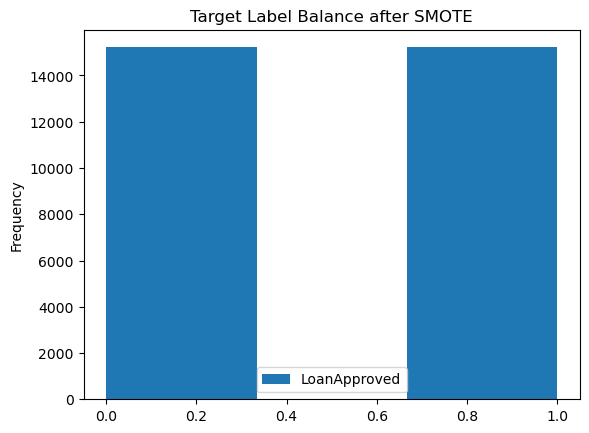

In [22]:
y_smote.plot.hist(bins=3, title='Target Label Balance after SMOTE')

<Axes: title={'center': 'Target Label Balance after SMOTE'}, ylabel='Frequency'>

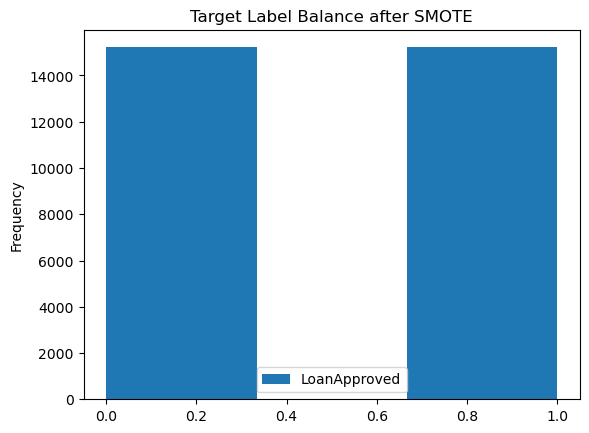

In [23]:
y_smote.plot.hist(bins=3, title='Target Label Balance after SMOTE')

<Axes: title={'center': 'Target Label Balance after Undersampling'}, ylabel='Frequency'>

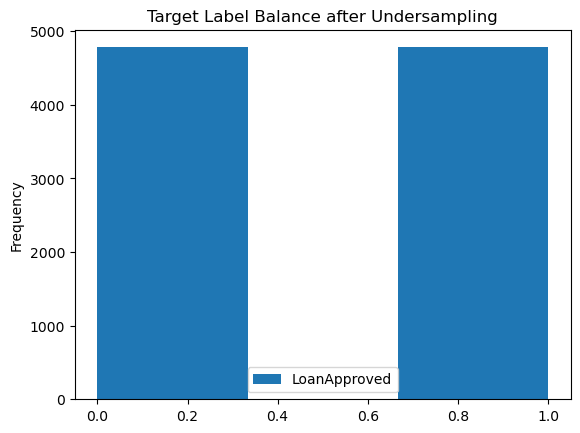

In [24]:
y_undersampled.plot.hist(bins=3, title='Target Label Balance after Undersampling')

## Train Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test

(       EmploymentStatus_Self-Employed  EmploymentStatus_Unemployed  \
 13656                           False                        False   
 26012                           False                        False   
 3860                            False                        False   
 11134                           False                         True   
 27471                           False                         True   
 ...                               ...                          ...   
 29802                           False                        False   
 5390                            False                        False   
 860                             False                        False   
 15795                           False                        False   
 23654                           False                        False   
 
        EducationLevel_Bachelor  EducationLevel_Doctorate  \
 13656                    False                     False   
 26012                  

## Standardization

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
def standardization(X_train, X_test):
    scaler = StandardScaler()

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return pd.DataFrame(X_train_scaled, columns=X_train.columns), pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [28]:
X_train_scaled, X_test_scaled = standardization(X_train, X_test)
X_train_scaled, X_test_scaled

(       EmploymentStatus_Self-Employed  EmploymentStatus_Unemployed  \
 0                           -0.357672                    -0.298231   
 1                           -0.357672                    -0.298231   
 2                           -0.357672                    -0.298231   
 3                           -0.357672                     3.353109   
 4                           -0.357672                     3.353109   
 ...                               ...                          ...   
 24347                       -0.357672                    -0.298231   
 24348                       -0.357672                    -0.298231   
 24349                       -0.357672                    -0.298231   
 24350                       -0.357672                    -0.298231   
 24351                       -0.357672                    -0.298231   
 
        EducationLevel_Bachelor  EducationLevel_Doctorate  \
 0                    -0.803579                 -0.306882   
 1                    -0

## Model Selection

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb


# knn_baseline = KNeighborsClassifier()
# rf_baseline = RandomForestClassifier()
# nb_baseline = GaussianNB()
# dt_baseline = DecisionTreeClassifier(random_state=0)
# xgb_baseline = xgb.XGBClassifier()

model_library = [
    ('KNN', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier(random_state=0)),
    ('XGBoost', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
]

## Model Training

### Hyperparameter Tuning

In [30]:
from sklearn.model_selection import GridSearchCV

def tune_hyperparameters(model_name, model, param_grid, X, y, cv=5):
    print(f"\n🔍 Tuning {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X, y.values.ravel())
    print(f"✅ Best params for {model_name}: {grid_search.best_params_}")
    return grid_search.best_estimator_


## Feature Selection using SkLearn

In [31]:
from sklearn.feature_selection import SelectKBest, f_classif

def select_features(X, y, k=10):
    selector = SelectKBest(score_func=f_classif, k=k)
    X_new = selector.fit_transform(X, y.values.ravel())
    
    selected_mask = selector.get_support()
    selected_features = X.columns[selected_mask]
    
    print(f"Top {k} features selected: {list(selected_features)}")
    return X_new, selector, list(selected_features)


### Cross Validation

In [32]:
from sklearn.model_selection import cross_val_score
import numpy as np

def evaluate_model(model_name, model, X, y, cv=5):
    scores = cross_val_score(model, X, y.values.ravel(), cv=cv, scoring='roc_auc')
    print(f"📈 {model_name} ROC AUC CV Score: {np.mean(scores):.4f} ± {np.std(scores):.4f}")
    return scores


## Bucket A Training

In [33]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from tqdm import tqdm

param_grids = {
    'KNN': {'n_neighbors': [30, 35, 40, 45, 50]},
    'Random Forest': {'n_estimators': [50, 75, 100, 150, 200], 'max_depth': [None, 3, 5, 10]},
    'Naive Bayes': {
    'var_smoothing': np.logspace(-9, -6, 4)  # Controls numerical stability
}
,
    # 'SVM': {'C': [0.1, 1, 5, 10], 'kernel': ['linear']},
    'Decision Tree' : {
    'max_depth': [None, 3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
},
    'XGBoost': {'n_estimators': [50, 75, 100, 150, 200], 'max_depth': [3, 5, 7]}
}

# Feature selection
X_selected, selector, selected_features_list = select_features(X_smote, y_smote, k=10)

# Tune and evaluate
best_models = {}
for name, model in tqdm(model_library, desc='Testing Models..'):
    best_model = tune_hyperparameters(name, model, param_grids.get(name, {}), X_selected, y_smote)
    best_models[name] = best_model
    # evaluate_model(name, best_model, X_selected, y)

Top 10 features selected: ['EducationLevel_Bachelor', 'EducationLevel_Master', 'AnnualIncome', 'LoanAmount', 'MonthlyIncome', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'RiskScore']


Testing Models..:   0%|          | 0/5 [00:00<?, ?it/s]


🔍 Tuning KNN...


Testing Models..:  20%|██        | 1/5 [00:03<00:12,  3.17s/it]

✅ Best params for KNN: {'n_neighbors': 50}

🔍 Tuning Random Forest...


Testing Models..:  40%|████      | 2/5 [03:17<05:46, 115.55s/it]

✅ Best params for Random Forest: {'max_depth': None, 'n_estimators': 200}

🔍 Tuning Naive Bayes...


Testing Models..:  60%|██████    | 3/5 [03:17<02:05, 62.92s/it] 

✅ Best params for Naive Bayes: {'var_smoothing': 1e-09}

🔍 Tuning Decision Tree...


In [ ]:
X_selected

In [ ]:
model_library = [
    ('KNN', KNeighborsClassifier(n_neighbors=45)),
    ('Random Forest', RandomForestClassifier(max_depth=None, n_estimators=200)),
    ('Naive Bayes', GaussianNB(var_smoothing=1e-09)),
    ('Decision Tree', DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=5,
                                            max_features=None, min_samples_leaf=8, min_samples_split=20)),
    ('XGBoost', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', max_depth=5, n_estimators=200))
]

In [ ]:
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score,
    recall_score, classification_report
)
from sklearn.preprocessing import label_binarize

def train_models(models, X_train, y_train, X_test, y_test):
    results = {}
    classes = np.unique(y_train)
    is_multiclass = len(classes) > 2
    y_test_binarized = label_binarize(y_test, classes=classes) if is_multiclass else y_test

    for name, model in models:
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Accuracy
        acc = accuracy_score(y_test, y_pred)

        # Precision & Recall
        precision = precision_score(y_test, y_pred, average='weighted' if is_multiclass else 'binary', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted' if is_multiclass else 'binary', zero_division=0)

        # Classification Report
        report = classification_report(y_test, y_pred, zero_division=0)

        # ROC AUC
        try:
            if hasattr(model, "predict_proba"):
                y_scores = model.predict_proba(X_test)
            elif hasattr(model, "decision_function"):
                y_scores = model.decision_function(X_test)
            else:
                y_scores = None

            if y_scores is not None:
                if is_multiclass:
                    roc_auc = roc_auc_score(y_test_binarized, y_scores, multi_class='ovr')
                else:
                    roc_auc = roc_auc_score(y_test, y_scores[:, 1])
            else:
                roc_auc = None
        except Exception as e:
            print(f"ROC AUC error for {name}: {e}")
            roc_auc = None

        # Print metrics
        print(f"{name} Accuracy:      {acc:.4f}")
        print(f"{name} Precision:     {precision:.4f}")
        print(f"{name} Recall:        {recall:.4f}")
        print(f"{name} ROC AUC:       {roc_auc:.4f}" if roc_auc is not None else f"{name} ROC AUC:       N/A")
        print(f"{name} Classification Report:\n{report}")

        # Store results
        results[name] = {
            'model': model,
            'accuracy': acc,
            'precision': precision,
            'recall': recall,
            'roc_auc': roc_auc,
            'classification_report': report,
            'y_pred': y_pred,
            'y_scores': y_scores  # <<--- ADD THIS LINE
        }


    return results

In [ ]:
bucket_A_model_results = train_models(model_library, X_train[selected_features_list], y_train, X_test[selected_features_list], y_test)
bucket_A_model_results

## Model Performance

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import (
    roc_curve, auc, classification_report, confusion_matrix
)

def visualize_model_performance(results, X_test, y_test):
    models = list(results.keys())

    # --- ROC Curves ---
    plt.figure(figsize=(10, 6))
    for name in models:
        model_info = results[name]
        y_scores = model_info['y_scores']

        if y_scores is None:
            print(f"Skipping ROC curve for {name} (no probability scores).")
            continue

        if len(np.unique(y_test)) > 2:
            print(f"Skipping ROC curve for {name} (multiclass ROC curve not implemented).")
            continue

        if y_scores.ndim > 1:
            y_scores = y_scores[:, 1]

        fpr, tpr, _ = roc_curve(y_test, y_scores)
        model_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {model_auc * 100:.4f}%)')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Trained Models')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Bar Chart of Metrics ---
    accuracies = [results[m]['accuracy'] for m in models]
    precisions = [results[m]['precision'] for m in models]
    recalls = [results[m]['recall'] for m in models]
    aucs = [results[m]['roc_auc'] if results[m]['roc_auc'] is not None else 0 for m in models]

    x = np.arange(len(models))
    width = 0.2

    plt.figure(figsize=(12, 6))
    plt.bar(x - 1.5*width, accuracies, width, label='Accuracy')
    plt.bar(x - 0.5*width, precisions, width, label='Precision')
    plt.bar(x + 0.5*width, recalls, width, label='Recall')
    plt.bar(x + 1.5*width, aucs, width, label='ROC AUC')

    plt.xticks(x, models, rotation=45)
    plt.ylim(0, 1)
    plt.ylabel('Score')
    plt.title('Model Performance Metrics')
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # --- Classification Reports and Confusion Matrices ---
    for name in models:
        model_info = results[name]
        y_pred = model_info['y_pred']

        print(f"\n--- Classification Report: {name} ---")
        print(classification_report(y_test, y_pred))

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(4, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix: {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        plt.show()

In [ ]:
visualize_model_performance(bucket_A_model_results, X_test_scaled[selected_features_list], y_test)

## Explainability with SHAP Values

In [ ]:
import xgboost as xgb
import lightgbm as lgbm
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron

from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# xgb_clf = xgb.XGBClassifier()
# ab_clf = AdaBoostClassifier()
# lgbm_clf = lgbm.LGBMClassifier()
# lr_clf = LogisticRegression()
# svm_clf = svm.SVC()
# perceptron_clf = Perceptron()
# rf_clf = RandomForestClassifier()

In [ ]:
!pip install shap

import shap

In [ ]:
def compute_shap_values(models: dict, X: pd.DataFrame, y: pd.Series):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for name, model in models.items():
        print(f"\nExplaining: {name}")

        # Fit the model
        model.fit(X_train, y_train)

        try:
            if isinstance(model, (xgb.XGBClassifier, lgbm.LGBMClassifier, RandomForestClassifier)):
                explainer = shap.TreeExplainer(model)
            elif isinstance(model, (AdaBoostClassifier, LogisticRegression, svm.SVC, Perceptron)):
                background = shap.kmeans(X_train, 10)
                explainer = shap.KernelExplainer(model.predict_proba, background)
            else:
                print(f"Skipping {name}: no compatible SHAP explainer.")
                continue

            shap_values = explainer.shap_values(X_test)

            if isinstance(shap_values, list):
                shap_values = shap_values[1 if len(shap_values) > 1 else 0]

            shap.summary_plot(shap_values, X_test, show=True)

        except Exception as e:
            print(f"Failed to explain {name}: {e}")


In [ ]:
shap_values, explainer = compute_shap_values(model, X)
shap.plots.beeswarm(shap_values)

In [ ]:
xgb_clf.fit(X_train, y_train)

explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In [ ]:
ab_clf.fit(X_train, y_train)

background = shap.kmeans(X_train, 10)
explainer = shap.KernelExplainer(ab_clf.predict, background)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In [ ]:
lgbm_clf.fit(X_train, y_train)

explainer = shap.TreeExplainer(lgbm_clf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In [ ]:
lr_clf.fit(X_train, y_train)

background = shap.kmeans(X_train, 10)
explainer = shap.KernelExplainer(lr_clf.predict, background)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In [ ]:
svm_clf.fit(X_train, y_train)

background = shap.kmeans(X_train, 10)
explainer = shap.KernelExplainer(svm_clf.predict, background)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In [ ]:
perceptron_clf.fit(X_train, y_train)

def wrapped_predict(X):
    return perceptron_clf.decision_function(X) if hasattr(perceptron_clf, 'decision_function') else perceptron_clf.predict(X)

background = shap.kmeans(X_train, 10)
explainer = shap.KernelExplainer(wrapped_predict, background)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)